In [1]:

from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader
import tiktoken
import seaborn as sns
import matplotlib.pyplot as plt
load_dotenv()



True

In [2]:


pdf_loader = PyPDFLoader('LangChain Tutorial_ A Step-by-Step Python Crash Course.pdf')
pdf_loader_1 = PyPDFLoader('Title_ Agent & Tools Memory tutorial_ How to Turn any function into langchain tool.pdf')

loaders = [pdf_loader, pdf_loader_1]

#lets create document 
documents = []
for loader in loaders:
    documents.extend(loader.load())


print (f'You have {len(documents)} document(s) in your data')
print (f'There are {len(documents[0].page_content)} characters in your document')


You have 14 document(s) in your data
There are 1137 characters in your document


In [3]:

tokenizer = tiktoken.get_encoding('cl100k_base')
def tiktoken_len(text):
    tokens = tokenizer.encode(
    text,
    disallowed_special=()
)
    return len(tokens)
tiktoken.encoding_for_model('gpt-3.5-turbo')
# create the length function
token_counts = []
for doc in documents:
    token_counts.append(tiktoken_len(doc.page_content))
min_token_count = min(token_counts)
avg_token_count = int(sum(token_counts) / len(token_counts))
max_token_count = max(token_counts)
print(f"Min: {min_token_count}")
print(f"Avg: {avg_token_count}")
print(f"Max: {max_token_count}")

Min: 166
Avg: 452
Max: 960


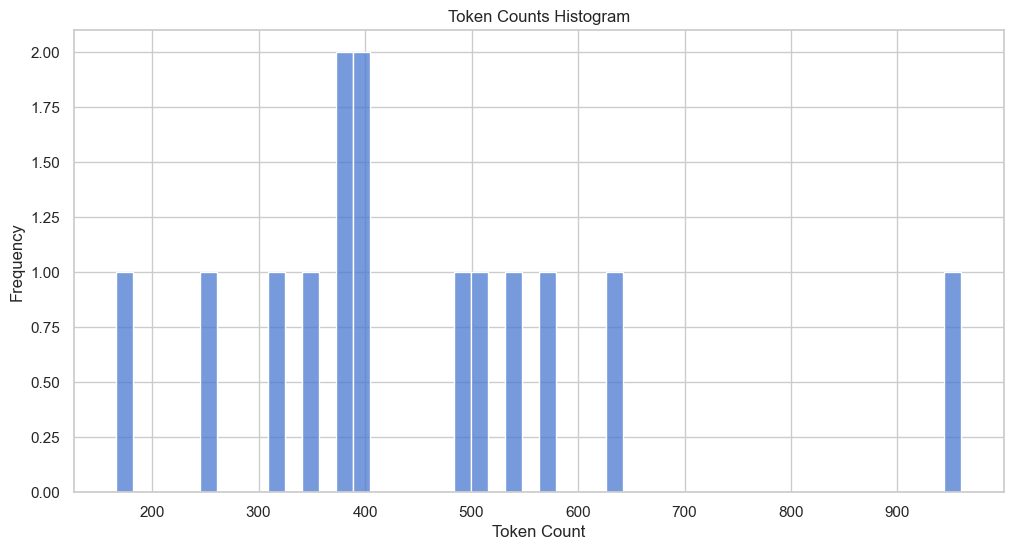

In [4]:
sns.set_theme(style="whitegrid", palette="muted")
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50, ax=ax)
ax.set_title("Token Counts Histogram")
ax.set_xlabel("Token Count")
ax.set_ylabel("Frequency")
plt.show()